In [20]:
import graphviz
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.tree import export_graphviz
from matplotlib import pylab as plt
%matplotlib inline

In [16]:
german_data = pd.read_csv('german_credit.csv', sep = ',')
data = german_data.drop('Creditability', 1)
target = german_data.Creditability
german_data.head()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


In [17]:
cross_val_score(DecisionTreeClassifier(), data, target).mean()

0.67298436160711617

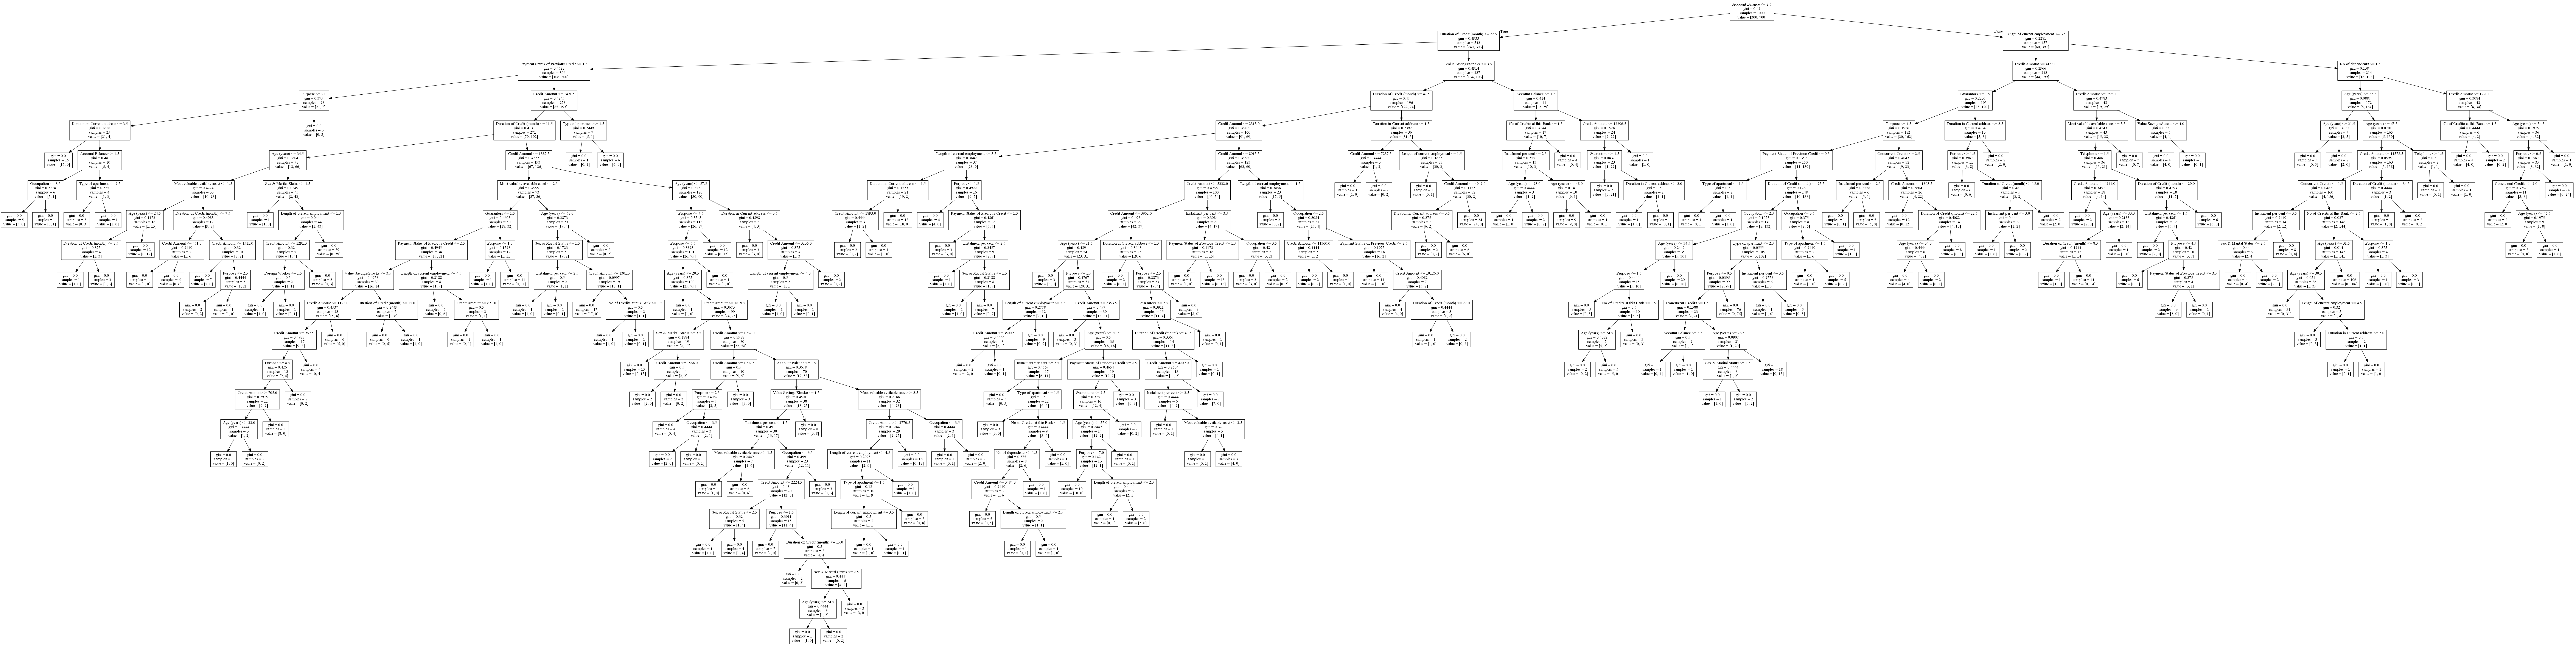

In [18]:
from IPython.display import Image  
from StringIO import StringIO
import pydotplus
dot_data = StringIO()  
tree = DecisionTreeClassifier()
tree.fit(data, target)
src = graphviz.Source(export_graphviz(tree, out_file=dot_data, feature_names=data.columns.values))
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
fd = open ('tree.png', 'w')
fd.write(dot_data.getvalue())
fd.close()
Image(graph.create_png())

Самыми значимыи признаками для возврата кредита являются текущий баланс счета, продолжительность кредита, длина текущего найма, размер кредита и то был ли оплачен предыдущий кредит.

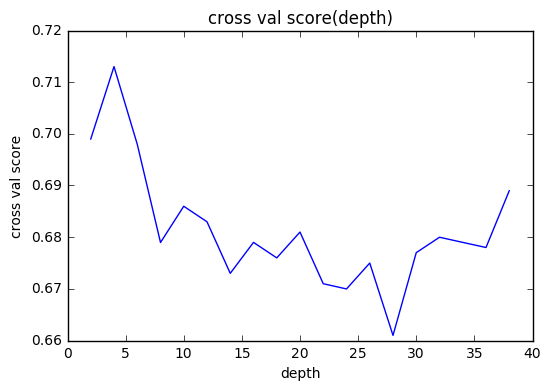

In [24]:
depths = range(2,40,2)
cv_scores = []
for depth in depths:
    cv_scores.append(cross_val_score(DecisionTreeClassifier(max_depth=depth), data,target).mean())
plt.plot(depths, cv_scores)
plt.xlabel("depth")
plt.ylabel("cross val score")
plt.title("cross val score(depth)")
plt.show()

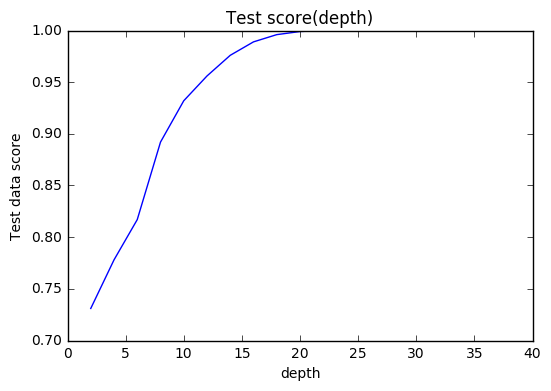

In [26]:
train_scores = []
for depth in depths:
    tree = DecisionTreeClassifier(max_depth=depth)
    tree.fit(data, target)
    train_scores.append(tree.score(data, target))
plt.plot(depths, train_scores)
plt.xlabel("depth")
plt.ylabel("Test data score")
plt.title("Test score(depth)")
plt.show()